1. Import packages to be used in the project 

In [9]:
#Packages 

#Manipulate data 
import numpy as np 
import pandas as pd 

#View graphs 
import seaborn as sns
from matplotlib import pyplot as plt

# split train and test dataset 
from sklearn.model_selection import train_test_split

# Perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Machine Learning Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Statistical Test 
from scipy import stats


#Evaluate the model 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

#Ignore Warnings 
import warnings
warnings.filterwarnings("ignore")

#Save the model
import joblib 
import pickle

In [10]:
#Setting of graphs 
from matplotlib import rcParams
rcParams['figure.figsize']=12,4
rcParams['lines.linewidth']=3
rcParams['xtick.labelsize']='x-large'
rcParams['ytick.labelsize']='x-large'

2. Loading the data 

In [11]:
# Load the file 
ds = pd.read_csv("Indian_Liver_Patient_Dataset.csv")

In [12]:
#3 - Exploratory analyses  

In [13]:
# shape 
ds.shape

(582, 11)

In [14]:
#view data 
ds.head()

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [15]:
#name of colums
ds.columns =["age","gender","total_bilirubin","direct_bilirubin","alkaline_phosphotase","alamine_aminotransferase",
           "aspartate_aminotransferase","total_proteins","albumin","ratio_albumin_and_globulin_ratio","target"]

In [16]:
#View data
ds.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [17]:
#shape
ds.shape

(582, 11)

2. Data Wrangling

In [18]:
# Its a important step to analyse types of variables, duplicate values, two  results in the same column, outiliers and values na.

In [19]:
#Types of variables 
ds.dtypes
#We have two types of variables, categorical and numerica

age                                   int64
gender                               object
total_bilirubin                     float64
direct_bilirubin                    float64
alkaline_phosphotase                  int64
alamine_aminotransferase              int64
aspartate_aminotransferase            int64
total_proteins                      float64
albumin                             float64
ratio_albumin_and_globulin_ratio    float64
target                                int64
dtype: object

In [20]:
ds.head()
#As show below, there aren't two values at the same column.

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


2.1 Duplicate values  

In [21]:
ds[ds.duplicated(keep=False)].count()
# As show below was identified 26 duplicate values 
# We need to remove them since can be a problem for the model. 

age                                 26
gender                              26
total_bilirubin                     26
direct_bilirubin                    26
alkaline_phosphotase                26
alamine_aminotransferase            26
aspartate_aminotransferase          26
total_proteins                      26
albumin                             26
ratio_albumin_and_globulin_ratio    26
target                              26
dtype: int64

In [22]:
ds1 = ds.drop_duplicates()

In [23]:
#Check if the duplicate values were removed 
ds1[ds1.duplicated(keep=False)].count()

age                                 0
gender                              0
total_bilirubin                     0
direct_bilirubin                    0
alkaline_phosphotase                0
alamine_aminotransferase            0
aspartate_aminotransferase          0
total_proteins                      0
albumin                             0
ratio_albumin_and_globulin_ratio    0
target                              0
dtype: int64

In [24]:
# shape 
ds1.shape

(569, 11)

2.2 Split the dataset

In [25]:

#It is  necessary to do the spliting of data, to do exploratory analyses and using boxplot,for example

In [26]:
# to analyse data is necessary split data in numerical and categorical 
#numerical
ds_numerical= ds1.select_dtypes(include=np.number)

In [27]:
ds_numerical.head()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [28]:
#categorical 
ds_categorical = ds.select_dtypes(include=np.object_)
ds_categorical 

,gender
0,Male
1,Male
2,Male
3,Male
4,Male
...,...
577,Male
578,Male
579,Male
580,Male


2.3 Outiliers

In [ ]:
#To analyse outliers the boxplot could be used as well as a descreptive analyse.

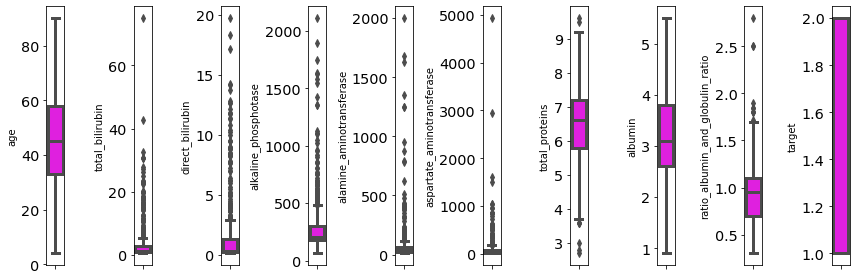

In [52]:

ncol = ds_numerical.columns
features = ncol
for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(y=ds_numerical[features[i]],color='magenta',orient='v')
    plt.tight_layout()

In [30]:
#According with the graph we have the most of variables with outliers. However, it's important to analyse the frequency for each feature.
#And the descriptive analyses 

In [31]:
#Descriptive analyses
ds1.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,565.000000,569.000000
mean,44.813708,3.326362,1.500000,291.934974,79.840070,109.541301,6.495782,3.148682,0.948088,1.288225
std,16.234432,6.272490,2.835117,245.468274,181.611654,291.111322,1.089183,0.797489,0.319912,0.453335
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [32]:
#Frequency 
def count_max_frequency(dataframe):
    max_frequency = {}
    for col in dataframe.columns:
        maximo=dataframe[col].max()
        max_value = dataframe[col].value_counts().loc[maximo]
        max_frequency[col] = (maximo,max_value)
    return max_frequency

In [33]:
count_max_frequency(ds_numerical)

{'age': (90, 1),
 'total_bilirubin': (75.0, 1),
 'direct_bilirubin': (19.7, 1),
 'alkaline_phosphotase': (2110, 1),
 'alamine_aminotransferase': (2000, 1),
 'aspartate_aminotransferase': (4929, 1),
 'total_proteins': (9.6, 1),
 'albumin': (5.5, 2),
 'ratio_albumin_and_globulin_ratio': (2.8, 1),
 'target': (2, 164)}

In [34]:
#According the count above, we have a small frequency for the max number(outlier). So , the frequency can't be cosidered to 
# remove the outlier. Nevertheless, when we compare the distance between these values and mean, it noticed that for the variable 
# aspartate_aminotransferase , we have an possible outilier, the value 4929 is so far from the media, 
#Therefore, these results will be removed. 

In [35]:
ds2=ds1[ds1.aspartate_aminotransferase<3000]

In [36]:
ds2.shape

(568, 11)

In [37]:
ds2.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,564.000000,568.000000
mean,44.776408,3.312324,1.492782,290.494718,77.779930,101.056338,6.494894,3.150000,0.948883,1.288732
std,16.224321,6.269066,2.832378,243.266447,174.990761,209.423245,1.089937,0.797571,0.319638,0.453573
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.750000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.955000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.250000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,2946.000000,9.600000,5.500000,2.800000,2.000000


<AxesSubplot:xlabel='aspartate_aminotransferase'>

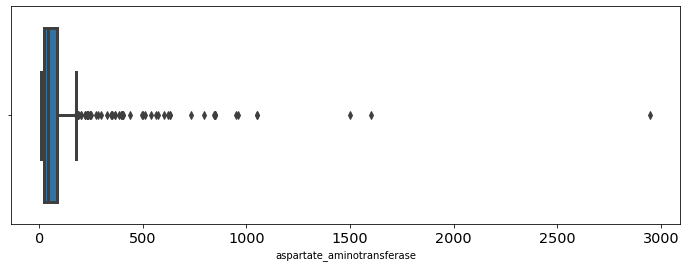

In [38]:
sns.boxplot(ds2.aspartate_aminotransferase)

In [ ]:
#as showed in the graph, we still have a possible outlier, to decide its removal, the frequency will be avaluate

In [39]:
count_max_frequency(ds2)

{'age': (90, 1),
 'gender': ('Male', 429),
 'total_bilirubin': (75.0, 1),
 'direct_bilirubin': (19.7, 1),
 'alkaline_phosphotase': (2110, 1),
 'alamine_aminotransferase': (2000, 1),
 'aspartate_aminotransferase': (2946, 1),
 'total_proteins': (9.6, 1),
 'albumin': (5.5, 2),
 'ratio_albumin_and_globulin_ratio': (2.8, 1),
 'target': (2, 164)}

In [ ]:
# as we have a low frequency, this value 2946 will be removed 

In [40]:
ds3 = ds2[ds2.aspartate_aminotransferase<2000]

In [41]:
ds3.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,563.000000,567.000000
mean,44.798942,3.295767,1.484480,290.664903,74.389771,96.038801,6.496296,3.149735,0.948259,1.289242
std,16.229748,6.262160,2.827953,243.447407,155.358328,172.077111,1.090387,0.798251,0.319578,0.453811
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,2.000000


2.4 na values

In [45]:
#Are the na values?
ds3.isnull().values.any()

True

In [46]:
#How many colums ?
ds3.isnull().values.any().sum()

1

In [48]:
#show na values
ds3[ds3.isnull().values]

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
208,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
240,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
252,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
311,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [ ]:
# how is only 4 lines, it will be removed 

In [49]:
ds4=ds3.dropna(how='any')

In [50]:
ds4.shape

(563, 11)

3. Exploratory analyses

We have two types of analyses, it's univariate, where is analyse one one feature  and bivariate where the variables will be compare with the target.

3.1 Numerical

Univariate

In [63]:
ds_numerical1= ds4.select_dtypes(include=np.number)

In [64]:
#statistical analyses 
ds_numerical1.describe()

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_proteins,albumin,ratio_albumin_and_globulin_ratio,target
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000
mean,44.836590,3.312789,1.492718,291.477798,74.769094,96.458259,6.494849,3.146359,0.948259,1.287744
std,16.262688,6.281095,2.836267,244.090958,155.844057,172.611560,1.089610,0.797193,0.319578,0.453114
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.500000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,1680.000000,1600.000000,9.600000,5.500000,2.800000,2.000000


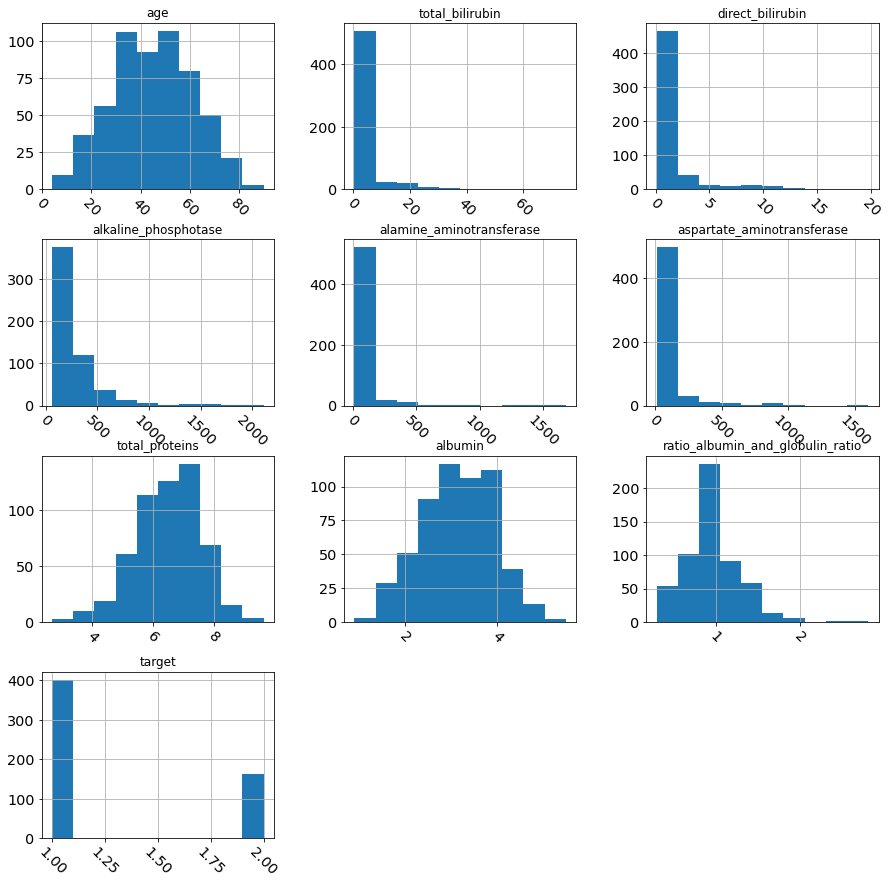

In [65]:
#Histograms
ds_numerical1.hist(figsize=(15,15),xrot=-45,bins=10)
plt.show()

In [ ]:
# Age, total_proteins  and albumin - seems to follow a normal distribution 
# to prove, it was done the normality test 

In [66]:
#Age 
alpha =0.05
k2,p=stats.normaltest(ds_numerical['age'])

if p < alpha:
    print("The null hypothesis can be rejected, because the p value is :{} ".format(p))
else:
    print("The null hypothesis cannot be rejected,because the p value  is: {} ".format(p))
    

The null hypothesis can be rejected, because the p value is :0.0006830161502218119 


In [ ]:
#P value was less then our significance level, so the probability of getting data like this is small. 
# Therefore, we can conclude that age doesn't follow a normal distribuiton.

In [67]:
#total_proteins
alpha =0.05
k2,p=stats.normaltest(ds_numerical['total_proteins'])
if p < alpha:
    print("The null hypothesis can be rejected, because the p value is :{} ".format(p))
else:
    print("The null hypothesis cannot be rejected,because the p value  is: {} ".format(p))

The null hypothesis can be rejected, because the p value is :0.005472450956377904 


In [68]:
    
#P value was less then our significance level, so the probability of getting data like this is small. 
# Therefore, we can conclude that total_proteins doesn't follow a normal distribuiton.

In [69]:
#albumin
alpha =0.05
k2,p=stats.normaltest(ds_numerical['albumin'])
if p < alpha:
    print("The null hypothesis can be rejected, because the p value is :{} ".format(p))
else:
    print("The null hypothesis cannot be rejected,because the p value  is: {} ".format(p))

The null hypothesis cannot be rejected,because the p value  is: 0.07373089474989515 


In [70]:
#P value was less then our significance level, so the probability of getting data like this is small. 
# Therefore, we can conclude that albumin doesn't follow a normal distribuiton.

In [71]:
#As the most of variables don't follow a normal distribution could be necessary processing the data before of applying the model.

Bivariate

In [ ]:
#Correlation
#It's a important tool that show the relationships among numeric variables
#It's a value between -1 and 1, values near this numbers indicate a strong relationship whereas values next to 0 indicate a weak relationship.
#For machine learning models, it's important that the variables don't show strong correlation with each other due to 
#multicollinearity problem. Nevertheless, it's import to have correlation with the target.

<AxesSubplot:>

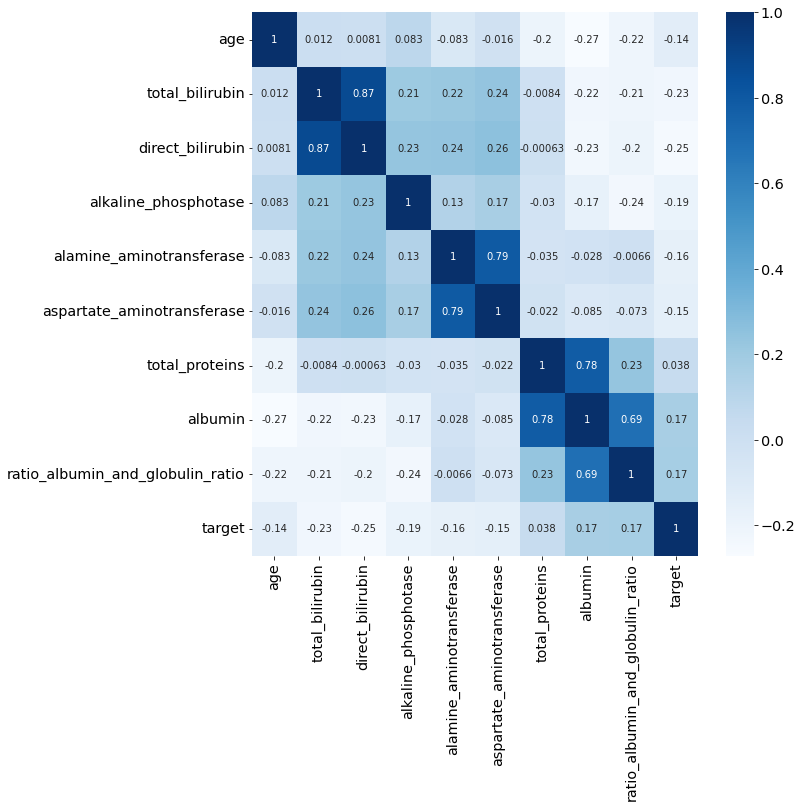

In [59]:
plt.figure(figsize= (10,10))
sns.heatmap(ds_numerical.corr(),cmap='Blues',annot=True)

In [ ]:
#It possible noticed at the graph that we have indications of multicollienarity in :
#total_bilirubin and direct_bilirubin have a correlation of 0.87
# aspartate_aminotransferase and alamine _aminotransferase have a correlation of 0.79
# total_proteins andalbumine have a correlation of 0.78
#multicollinearity could be a problem because undermines the statistical significance of a independent variable. 
#Therefore, it's important to solve this question before of applying the model. 

In [ ]:
#Categorical variable 